In [324]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt

In [331]:
hh_df = pd.read_csv('median_sale_price_sfr.csv')
hh_df


,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2023-02-04,2023-02-11,2023-02-18,2023-02-25,2023-03-04,2023-03-11,2023-03-18,2023-03-25,2023-04-01,2023-04-08
0,102001,0,United States,country,NaN,178500.0,175000.0,175900.0,172000.0,178000.0,...,325000.0,327400.0,334905.0,336000.0,345000.0,342500.0,344000.0,345000.0,345000.0,350000.0
1,394913,1,"New York, NY",msa,NY,405000.0,418000.0,407000.0,415000.0,392000.0,...,550000.0,547000.0,547625.0,549000.0,535000.0,545000.0,550000.0,550000.0,535000.0,558500.0
2,753899,2,"Los Angeles, CA",msa,CA,519000.0,545000.0,563750.0,538500.0,540000.0,...,865000.0,825000.0,840000.0,850000.0,850000.0,856000.0,864000.0,869500.0,880000.0,870000.0
3,394463,3,"Chicago, IL",msa,IL,242500.0,240000.0,240000.0,250000.0,250000.0,...,280000.0,265950.0,279000.0,285000.0,290000.0,289500.0,300000.0,295000.0,300000.0,305000.0
4,394514,4,"Dallas, TX",msa,TX,133990.0,137950.0,130500.0,136500.0,139900.0,...,375000.0,375000.0,380000.0,380000.0,380000.0,373000.0,375000.0,375000.0,379945.0,388000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,395079,274,"Sebastian, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,370000.0,365000.0,347000.0,350000.0,360000.0,384900.0,430000.0,409500.0,395000.0,415500.0
168,395163,287,"Traverse City, MI",msa,MI,NaN,NaN,NaN,NaN,NaN,...,390000.0,360000.0,364500.0,295000.0,360000.0,349000.0,350000.0,346500.0,324000.0,412500.0
169,394685,289,"Homosassa Springs, FL",msa,FL,NaN,NaN,NaN,NaN,NaN,...,300000.0,261900.0,247000.0,266490.0,264500.0,274000.0,260198.0,272000.0,259600.0,264950.0
170,395168,374,"Tullahoma, TN",msa,TN,NaN,NaN,NaN,NaN,NaN,...,210000.0,190000.0,262000.0,203000.0,244950.0,247450.0,244458.0,233000.0,261000.0,283000.0


In [332]:
# hh_df = pd.DataFrame(pd.read_csv('zillow_sfr_nsa.csv').loc[39,:])
# hh_df = hh_df.reset_index().rename(columns ={'index':'ds',39:'y'} ).loc[5:,:].reset_index(drop=True)
# hh_df

hh_df = pd.read_csv('median_sale_price_sfr.csv')
hh_df = hh_df[hh_df['RegionName'].str.contains('HI')]
hh_df = hh_df.loc[53,:]
hh_df = hh_df.reset_index().rename(columns ={'index':'ds',53:'y'} ).loc[5:,:].reset_index(drop=True)
hh_df

,ds,y
0,2008-02-02,483500.0
1,2008-02-09,493500.0
2,2008-02-16,493000.0
3,2008-02-23,590000.0
4,2008-03-01,559000.0
...,...,...
788,2023-03-11,1020000.0
789,2023-03-18,950000.0
790,2023-03-25,1070000.0
791,2023-04-01,900000.0


In [333]:
model = Prophet()
model.fit(hh_df)

09:05:00 - cmdstanpy - INFO - Chain [1] start processing
09:05:00 - cmdstanpy - INFO - Chain [1] done processing


In [334]:
future = model.make_future_dataframe(periods=52*5, freq='W')
forecast = model.predict(future)

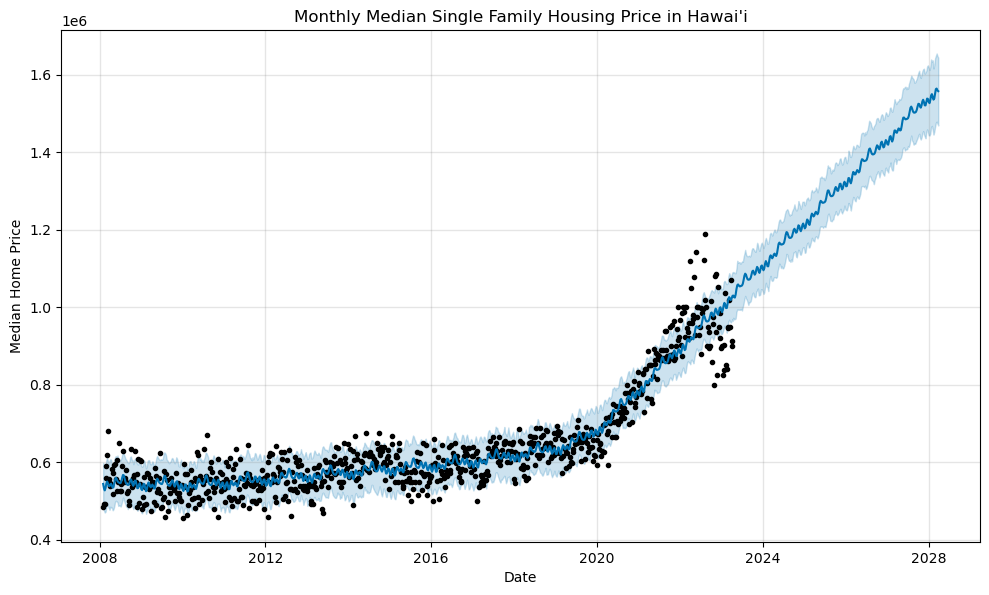

In [335]:
fig = model.plot(forecast, xlabel='Date',ylabel=r'Median Home Price')
plt.title("Monthly Median Single Family Housing Price in Hawai'i")
plt.show()
plt.show()

In [342]:
pandemic_start = pd.DataFrame({'holiday': 'pandemic_start',
                      'ds': pd.to_datetime(['2020-02-01']),
                      'lower_window': 0,
                      'upper_window': 122})


pandemic = pd.concat([pandemic_start])


changepoints = ['2020-04-01',
                '2022-08-01']

In [343]:
hh_df['floor'] = 550000
hh_df['cap'] = 1200000

model = Prophet(seasonality_mode='additive',
                growth='logistic',

                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                seasonality_prior_scale=.5,

                changepoints=changepoints,
                changepoint_prior_scale=0.5,
                
                holidays=pandemic,
                holidays_prior_scale=.9
                )


model.add_seasonality(name='yearly',
                      period=365.25,
                      fourier_order=10,
                      prior_scale=0.1)


model.add_seasonality(name='monthly',
                      period=30,
                      fourier_order=10,
                      prior_scale=0.1)

                    
model.fit(hh_df)



09:11:04 - cmdstanpy - INFO - Chain [1] start processing
09:11:05 - cmdstanpy - INFO - Chain [1] done processing


In [344]:
future = model.make_future_dataframe(periods=52*2, freq='W')


future['floor'] = 550000
future['cap'] = 1200000
forecast = model.predict(future)

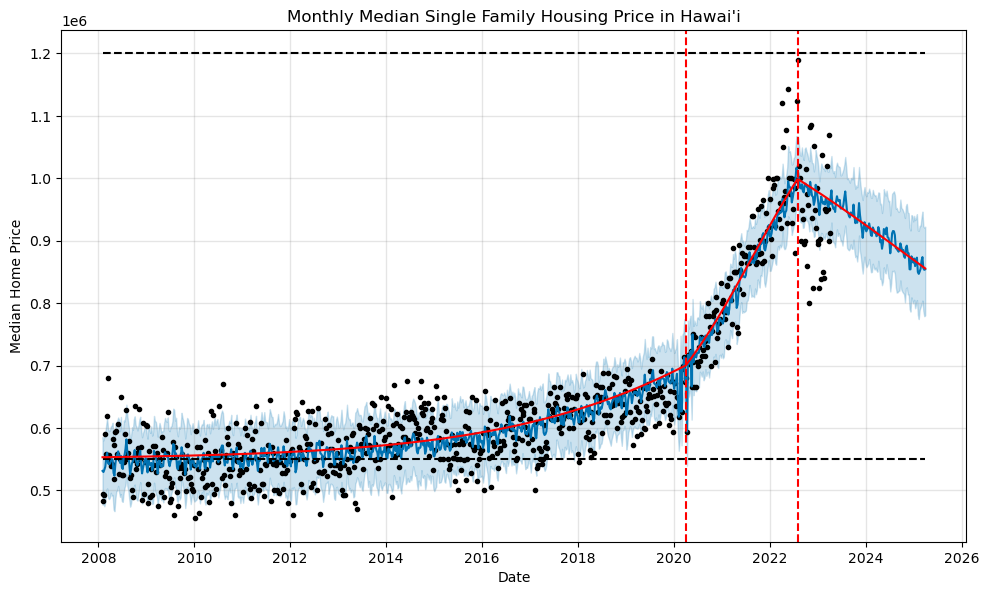

In [345]:
fig = model.plot(forecast, xlabel='Date',ylabel=r'Median Home Price')
plt.title("Monthly Median Single Family Housing Price in Hawai'i")
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()
plt.show()

In [340]:
forecast.tail(10).T

,887,888,889,890,891,892,893,894,895,896
ds,2025-01-26 00:00:00,2025-02-02 00:00:00,2025-02-09 00:00:00,2025-02-16 00:00:00,2025-02-23 00:00:00,2025-03-02 00:00:00,2025-03-09 00:00:00,2025-03-16 00:00:00,2025-03-23 00:00:00,2025-03-30 00:00:00
trend,915791.380448,915106.320576,914420.898605,913735.120537,913048.992386,912362.52018,911675.709958,910988.567772,910301.099686,909613.311774
cap,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000,1200000
floor,550000,550000,550000,550000,550000,550000,550000,550000,550000,550000
yhat_lower,852556.017824,831627.842645,824349.657671,829537.447942,837402.754165,845318.24462,855201.688642,840843.078973,836849.003825,834058.15789
yhat_upper,996344.755794,972369.418166,972173.599539,979035.0904,978834.303699,987995.030223,995173.449769,978761.966823,982328.013379,982294.63456
trend_lower,912430.73507,911583.752685,910789.697189,909852.242204,908288.727877,906720.926878,905150.04465,904129.954065,903266.698795,902049.422333
trend_upper,918598.753781,917963.511768,917328.934981,916694.574215,916059.584496,915419.534881,914774.600237,914193.174038,913906.601643,913439.362553
additive_terms,8119.85982,-14011.467563,-15974.127518,-11322.771194,-5834.062211,8214.546294,15226.246869,-1445.928455,-3033.216529,-1873.634938
additive_terms_lower,8119.85982,-14011.467563,-15974.127518,-11322.771194,-5834.062211,8214.546294,15226.246869,-1445.928455,-3033.216529,-1873.634938


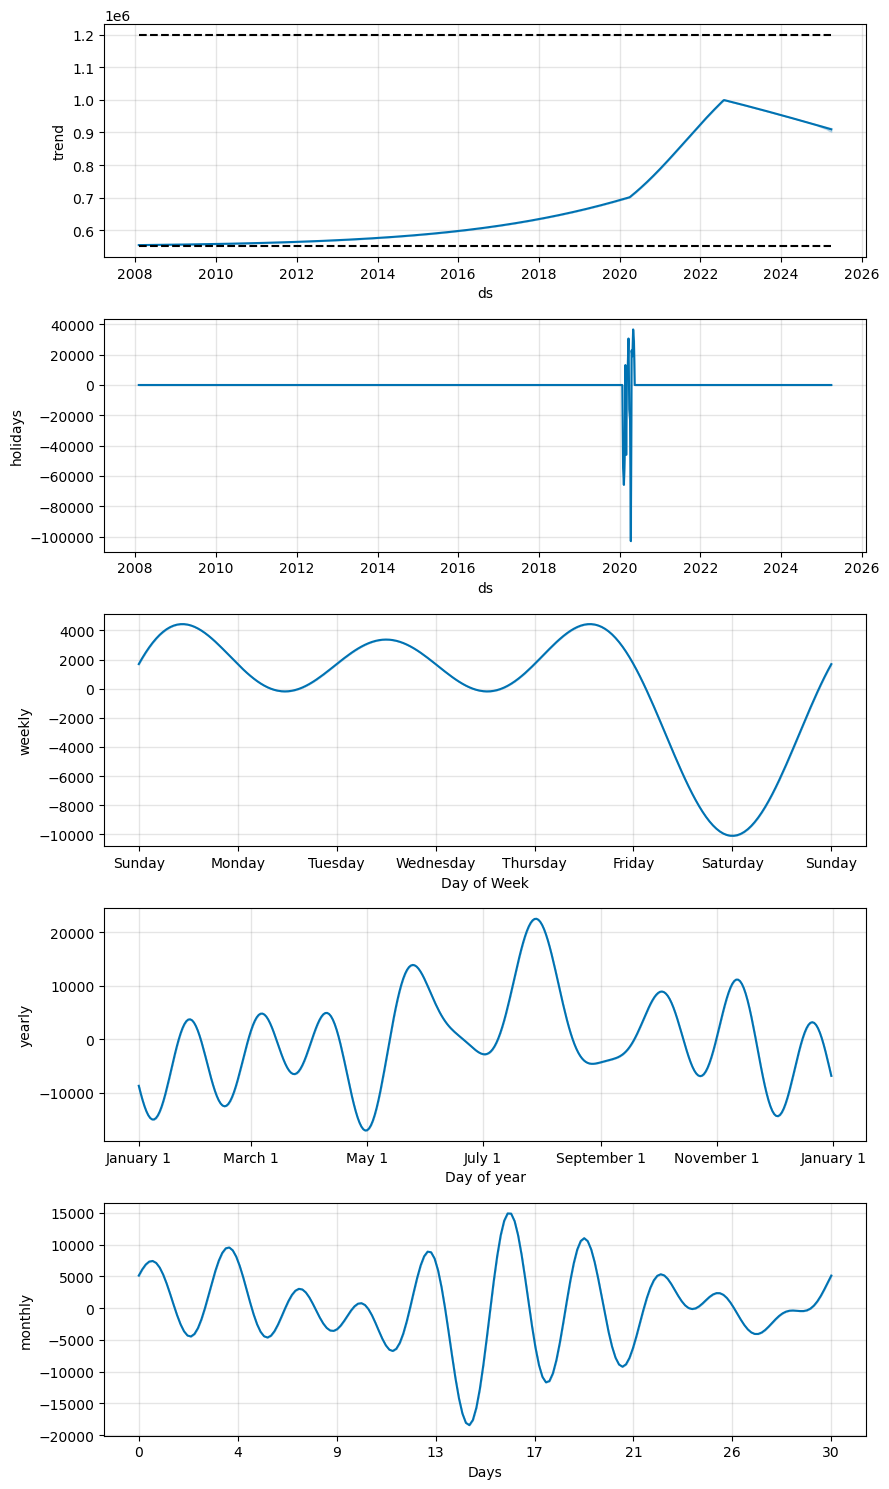

In [341]:
fig2 = model.plot_components(forecast)
plt.show()

In [346]:
hh_df2 = hh_df[(hh_df['ds'] < '2020-04-01') |
         (hh_df['ds'] > '2023-04-01')]

In [347]:

hh_df2['floor'] = 550000
hh_df2['cap'] = 1200000


model = Prophet(seasonality_mode='additive',
                growth='logistic',

                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=False,
                seasonality_prior_scale=.5,
                )


model.add_seasonality(name='yearly',
                      period=365.25,
                      fourier_order=10,
                      prior_scale=0.1)


model.add_seasonality(name='monthly',
                      period=30,
                      fourier_order=10,
                      prior_scale=0.1)

                    
model.fit(hh_df2)

/var/folders/r4/fdchq33x2vg7z1_7dstrhrn80000gn/T/ipykernel_21530/2383908269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_df2['floor'] = 550000
/var/folders/r4/fdchq33x2vg7z1_7dstrhrn80000gn/T/ipykernel_21530/2383908269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh_df2['cap'] = 1200000
09:27:16 - cmdstanpy - INFO - Chain [1] start processing
09:27:16 - cmdstanpy - INFO - Chain [1] done processing


In [348]:
future = model.make_future_dataframe(periods=52*5, freq='W')

future['floor'] = 550000
future['cap'] = 1200000

forecast = model.predict(future)

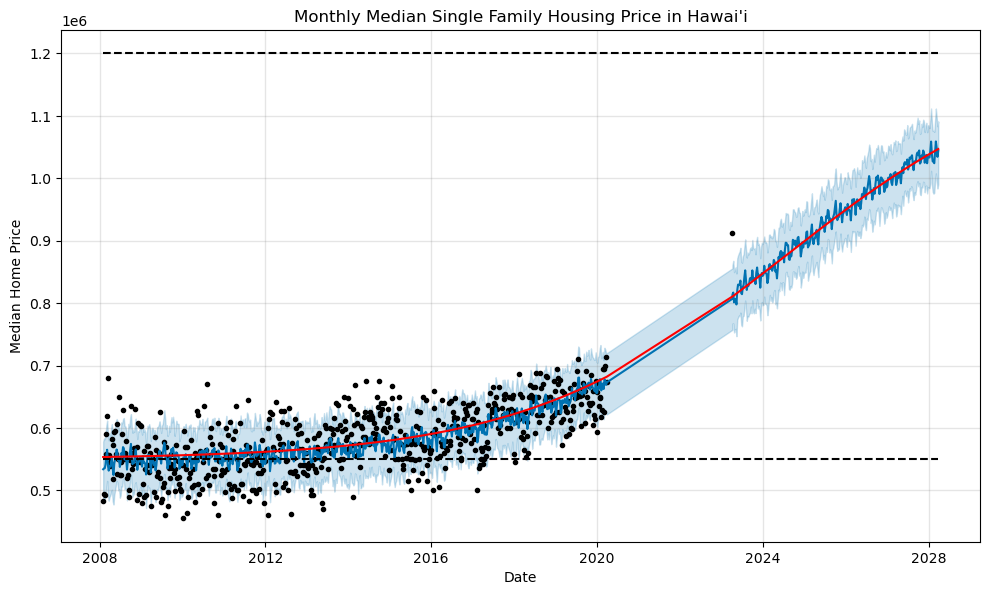

In [349]:
fig = model.plot(forecast, xlabel='Date',ylabel=r'Median Home Price')
plt.title("Monthly Median Single Family Housing Price in Hawai'i")
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()
plt.show()